In [2]:
# -----------------------------------------
# Task 4: Logistic Regression Classification
# Dataset: Breast Cancer (Built-in Scikit-learn)
# -----------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    roc_curve, auc, ConfusionMatrixDisplay
)

# -----------------------------------------
# 1. Load Dataset
# -----------------------------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset loaded successfully!")
print("Features:", X.shape)
print("Target classes:", y.unique())

# -----------------------------------------


Dataset loaded successfully!
Features: (569, 30)
Target classes: [0 1]


In [4]:
# 2. Train-Test Split + Standardization
# -----------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------------------

In [5]:
# 3. Logistic Regression Model
# -----------------------------------------
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]   # probability of class 1

# -----------------------------------------


=== Evaluation Metrics ===
Accuracy : 0.9736842105263158
Precision: 0.9722222222222222
Recall   : 0.9859154929577465

Confusion Matrix:
 [[41  2]
 [ 1 70]]


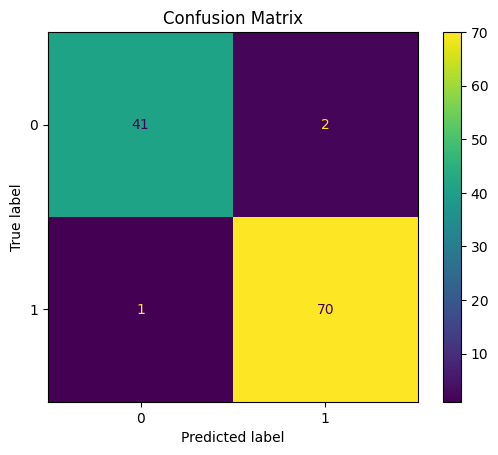

In [6]:
# 4. Evaluation Metrics
# -----------------------------------------
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\n=== Evaluation Metrics ===")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("\nConfusion Matrix:\n", cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# -----------------------------------------

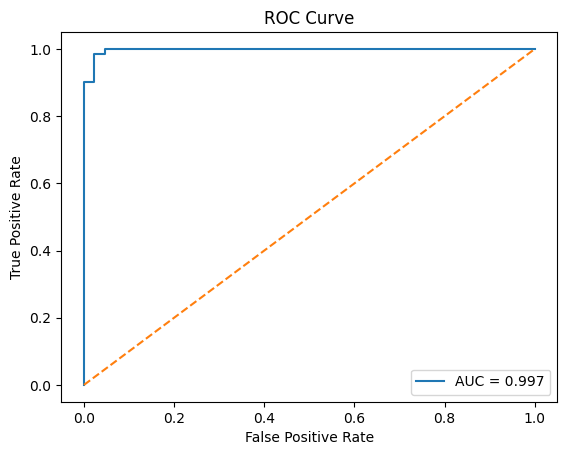

In [7]:
# 5. ROC Curve & AUC
# -----------------------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# -----------------------------------------

In [8]:
# 6. Threshold Tuning Example
# -----------------------------------------
threshold = 0.6   # change threshold here
y_pred_custom = (y_prob >= threshold).astype(int)

print(f"\nCustom Threshold ({threshold}) Results:")
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall   :", recall_score(y_test, y_pred_custom))

# -----------------------------------------


Custom Threshold (0.6) Results:
Precision: 0.9859154929577465
Recall   : 0.9859154929577465


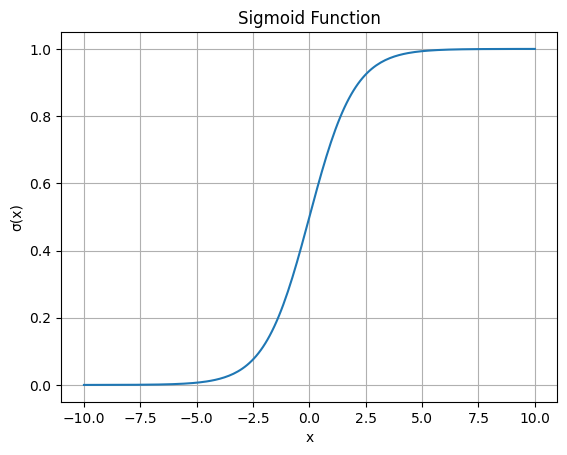

In [9]:
# 7. Sigmoid Function Visualization
# -----------------------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_vals = np.linspace(-10, 10, 200)
plt.plot(x_vals, sigmoid(x_vals))
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("σ(x)")
plt.grid(True)
plt.show()